In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state


In [2]:

n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50. * np.log(1 + np.arange(n))



In [5]:
y.shape

(100,)

In [7]:
x.shape

(100,)

In [8]:
# #############################################################################
# Fit IsotonicRegression and LinearRegression models

ir = IsotonicRegression()

y_ = ir.fit_transform(x, y)



In [14]:
x[:, np.newaxis].shape

(100, 1)

In [15]:
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
lr.coef_

array([1.31347944])

In [19]:
# #############################################################################
# Plot result

segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(0.5 * np.ones(n))



In [20]:
segments

[[[0, -6.0], [0, -6.0]],
 [[1, 31.657359027997266], [1, 31.657359027997266]],
 [[2, 68.93061443340548], [2, 68.93061443340548]],
 [[3, 86.31471805599453], [3, 77.4581957130341]],
 [[4, 97.47189562170502], [4, 77.4581957130341]],
 [[5, 48.587973461402754], [5, 77.4581957130341]],
 [[6, 130.29550745276566], [6, 100.37627113452281]],
 [[7, 74.97207708399179], [7, 100.37627113452281]],
 [[8, 95.86122886681098], [8, 100.37627113452281]],
 [[9, 152.1292546497023], [9, 142.77028731284636]],
 [[10, 139.89476363991855], [10, 142.77028731284636]],
 [[11, 162.24533248940003], [11, 142.77028731284636]],
 [[12, 166.24746787307683], [12, 142.77028731284636]],
 [[13, 93.9528664807629], [13, 142.77028731284636]],
 [[14, 143.4025100551105], [14, 142.77028731284636]],
 [[15, 153.62943611198907], [15, 142.77028731284636]],
 [[16, 130.6606672028108], [16, 142.77028731284636]],
 [[17, 181.51858789480823], [17, 159.46232588434722]],
 [[18, 143.221948958322], [18, 159.46232588434722]],
 [[19, 187.78661367769

In [22]:
x[:, np.newaxis].shape

(100, 1)

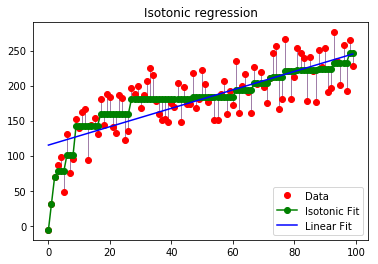

In [23]:
fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'g.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()